In [57]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [58]:
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [59]:
print(shoppers_data.shape)

(12330, 18)


In [60]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [61]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


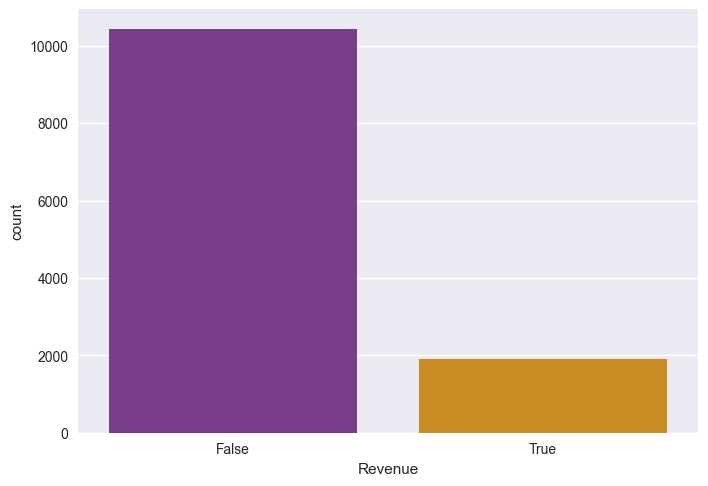

In [62]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

In [63]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

In [64]:
from sklearn.model_selection import train_test_split

# Здесь X - матрица признаков, y - вектор целевых значений
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [65]:
print(X_train.shape[0])
print(X_test.shape[0])

9864
2466


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score

# Создаем модель случайного леса с заданным random_state
rf_classifier = RandomForestClassifier(random_state=42)

# Создаем объект StratifiedKFold для стратифицированной кросс-валидации
stratified_kfold = StratifiedKFold(n_splits=5)

# Оцениваем модель с помощью кросс-валидации с метрикой F1-score
cv_results = cross_validate(rf_classifier, X_train, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)

# Получаем средние значения метрики F1-score на тренировочных и валидационных фолдах
train_f1_mean = cv_results['train_score'].mean()
test_f1_mean = cv_results['test_score'].mean()

# Выводим результаты, округленные до двух знаков после точки-разделителя
print(f"Среднее значение F1-score на тренировочных фолдах: {train_f1_mean:.2f}")
print(f"Среднее значение F1-score на валидационных фолдах: {test_f1_mean:.2f}")


Среднее значение F1-score на тренировочных фолдах: 1.00
Среднее значение F1-score на валидационных фолдах: 0.65


In [67]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

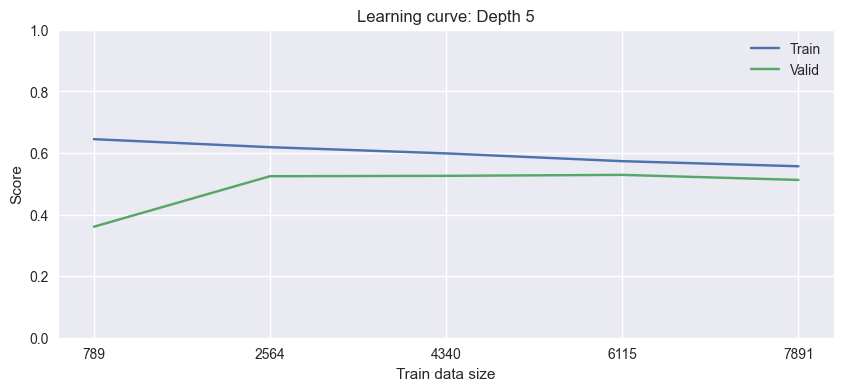

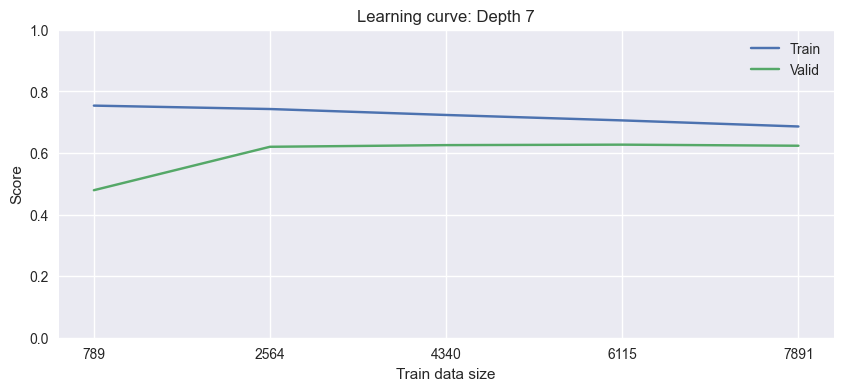

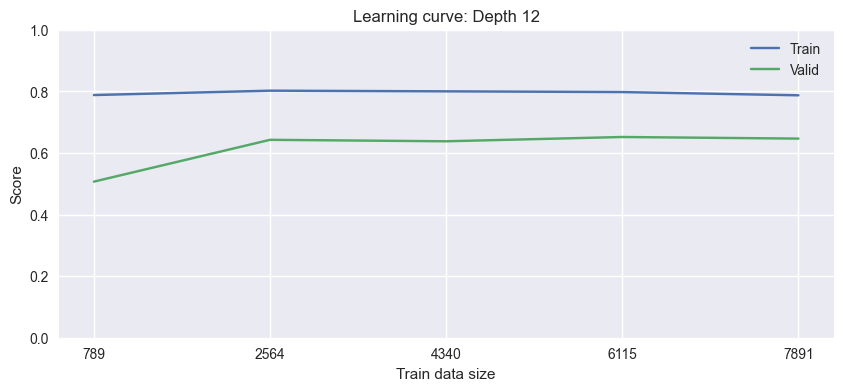

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Создайте список моделей с разными глубинами деревьев
models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=5, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_leaf=5, random_state=42)
]

# Названия для моделей (можно использовать глубины деревьев)
model_names = ['Depth 5', 'Depth 7', 'Depth 12']

# Постройте кривые обучения для каждой модели
for model, name in zip(models, model_names):
    plot_learning_curve(model, X_train, y_train, cv=stratified_kfold, scoring='f1', title=name)

plt.show()


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Создаем модель случайного леса с максимальной глубиной 7
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42)

# Обучаем модель на тренировочной выборке
rf_classifier.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = rf_classifier.predict(X_test)

# Выводим отчет о метриках классификации
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# Создаем модель случайного леса с оптимальной максимальной глубиной
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42)

# Получаем предсказанные вероятности на кросс-валидации
y_probas = cross_val_predict(rf_classifier, X_train, y_train, cv=stratified_kfold, method='predict_proba')

# Извлекаем вероятности для класса True (покупка)
y_true_probas = y_probas[:, 1]

# Вычисляем точность и полноту для разных порогов вероятности
precision, recall, thresholds = precision_recall_curve(y_train, y_true_probas)

# Находим порог вероятности, соответствующий максимальной F1-мере
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Выводим значение выбранного порога вероятности
print(f"Выбранный порог вероятности: {best_threshold:.2f}")


Выбранный порог вероятности: 0.36


In [76]:
from sklearn.metrics import classification_report

# Определяем порог вероятности
threshold = best_threshold

# Создаем модель случайного леса с оптимальной максимальной глубиной
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_leaf=5, random_state=42)

# Обучаем модель на тренировочной выборке
rf_classifier.fit(X_train, y_train)

# Делаем предсказания вероятностей на тестовой выборке
y_probas_test = rf_classifier.predict_proba(X_test)

# Извлекаем вероятности для класса True (покупка)
y_true_probas_test = y_probas_test[:, 1]

# Создаем предсказания классов с использованием порога вероятности
y_pred_test = (y_true_probas_test >= threshold).astype(int)

# Выводим отчет о метриках классификации
report = classification_report(y_test, y_pred_test, target_names=['False', 'True'])
print(report)


              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

